assignment from https://cjtu.github.io/spirl/f21_a3.html

In [1]:
# import packages
import matplotlib.pyplot as plt
import numpy as np

In [2]:
velocity = np.array(
    [37.535, 52.845, 53.918, 30.931, 5.6, 39.144, 22.699, 19.801, 17.425, 39.381, 73.684, 9.484, 45.404, 46.831, 55.452,
     20.019, 44.051, 18.543, 79.721, 31.844, 64.963, 75.49, 39.81, 9.999, 28.751, 45.333, 23.268, 78.313, 76.148, 62.0,
     47.152, 60.666, 34.733, 15.867, 12.259, 17.917, 76.266, 64.811, 55.157, 56.686, 73.041, 40.553, 53.292, 55.885,
     32.44, 41.581, 67.152, 48.553, 15.797, 61.86])
cc = np.array(
    [19.169, -2.234, 0.897, 45.039, 17.204, 17.93, 55.546, 44.068, 39.233, 13.922, -0.699, 11.723, 1.399, 8.346, -4.435,
     39.067, 4.272, 35.141, 1.099, 33.662, 9.232, -2.758, 5.609, 14.435, 52.204, 8.086, 38.945, -7.799, 3.969, 6.933,
     2.702, -3.327, 22.832, 32.447, 23.415, 34.154, -5.133, -7.918, 4.573, -8.673, -5.608, 20.915, -4.282, 0.947,
     44.091, 4.933, -1.385, 2.817, 28.38, 4.481])
cc_err = np.array(
    [-0.0371, -2.9829, 0.3501, 7.2887, 8.3716, 2.6817, 7.9506, 0.1183, 0.5635, -0.7848, -0.6988, -5.0142, -3.4584,
     4.8028, -4.7763, -5.2763, -2.158, -6.2191, 1.0985, -1.6264, 9.2215, -2.7585, -8.1463, -3.577, 9.327, 3.1537,
     -8.927, -7.7991, 3.9685, 6.8977, -0.5885, -3.385, -4.1511, -2.0367, -0.6787, -5.7387, -5.1329, -7.93, 4.1986,
     -8.9031, -5.6084, 8.7182, -4.9393, 0.6498, 10.4736, -5.3009, -1.3893, 0.4611, -5.9066, 4.4444])

Personally, it is weird to have negative values as error. The data above will be processed with the following two approaches:
- Proceed as usual, and
- Exclude the abnormal statistic (that is, those with negative error)

In [3]:
import scipy.optimize


# define Gaussian func
def gaussian_func(x, amp, mu, sigma):
    return amp * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))


# fit Gaussian func params
popt_abs, pcov_abs = scipy.optimize.curve_fit(f=gaussian_func,
                                              xdata=velocity,
                                              ydata=cc,
                                              sigma=cc_err,
                                              absolute_sigma=True)

# exclude abnormal statistics and fit params
velocity_filtered = velocity[cc_err >= 0]
cc_filtered = cc[cc_err >= 0]
cc_err_filtered = cc_err[cc_err >= 0]
popt_drop, pcov_drop = scipy.optimize.curve_fit(f=gaussian_func,
                                                xdata=velocity_filtered,
                                                ydata=cc_filtered,
                                                sigma=cc_err_filtered)


Text(0, 0.5, 'Cross-Correlation')

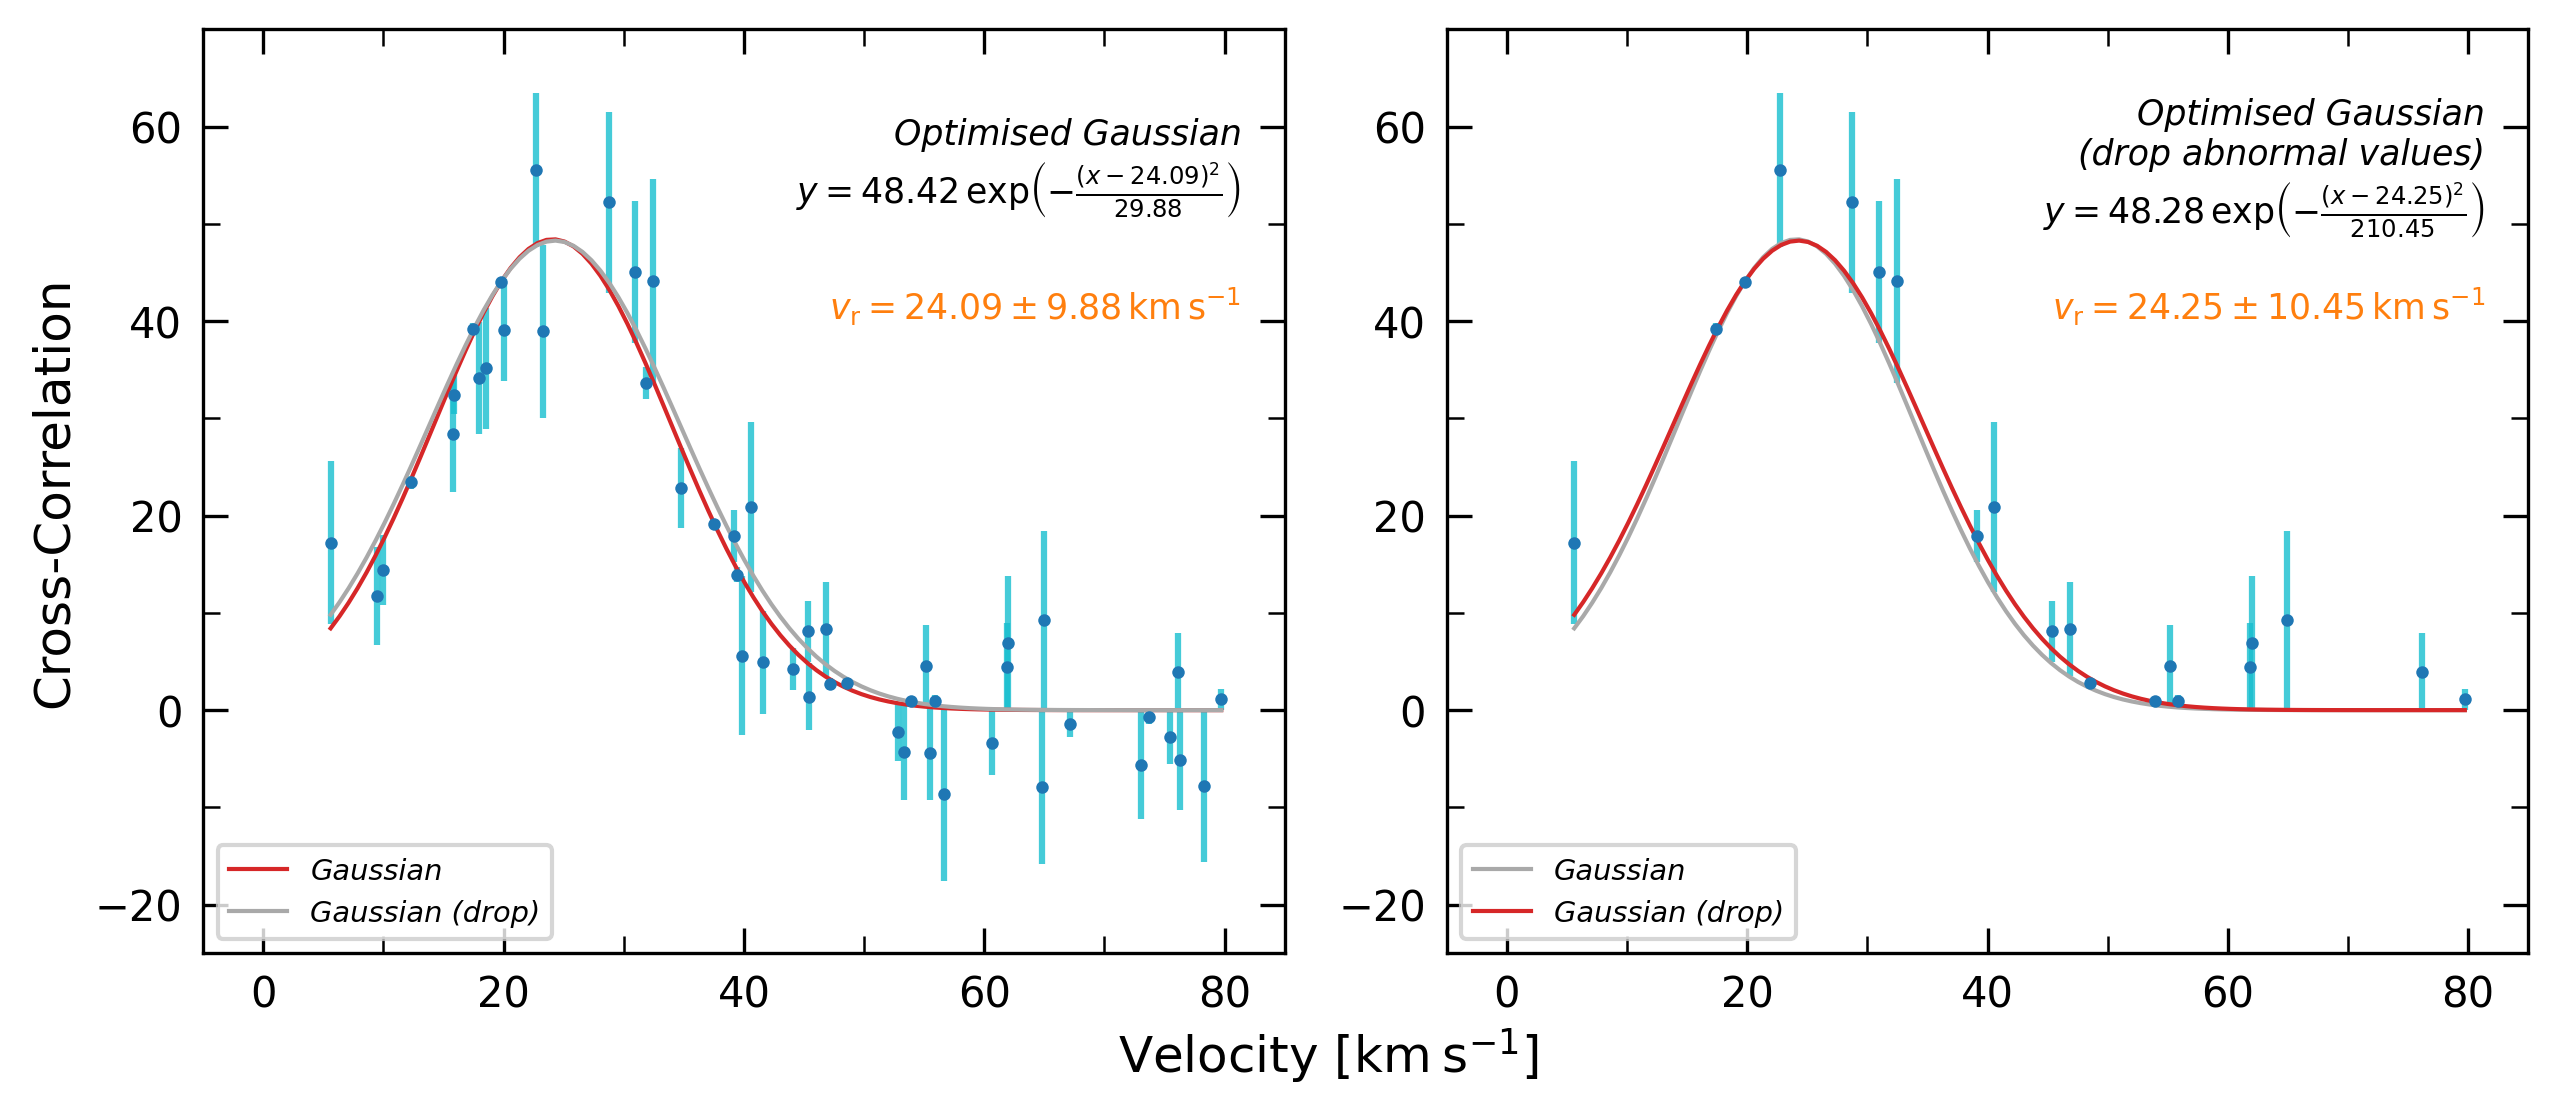

In [4]:
from matplotlib.ticker import AutoMinorLocator

# initialise figure and sub axes
fig, ax = plt.subplots(1, 2, figsize=(10, 4),
                       facecolor='white', dpi=300,
                       gridspec_kw={'hspace': .15, 'wspace': .15})

# plot statistic and Gaussian func
velocity_plot = np.linspace(start=np.nanmin(velocity), stop=np.nanmax(velocity),
                            num=100, endpoint=True)
for axis in ax:
    _, caps, bars = axis.errorbar(x=velocity if axis != ax[1] else velocity_filtered,
                                  y=cc if axis != ax[1] else cc_filtered,
                                  yerr=abs(cc_err) if axis != ax[1] else cc_err_filtered,
                                  fmt='.', ms=6, mew=0, mec=None,
                                  color='tab:blue', ecolor='tab:cyan',
                                  capsize=0, lw=1.5)
    [bar.set_alpha(.8) for bar in bars]
    [cap.set_alpha(.8) for cap in caps]
    axis.plot(velocity_plot, gaussian_func(velocity_plot, *popt_abs),
              c='tab:red' if axis != ax[1] else 'darkgrey', lw=1,
              label='Gaussian')
    axis.plot(velocity_plot, gaussian_func(velocity_plot, *popt_drop),
              c='tab:red' if axis != ax[0] else 'darkgrey', lw=1,
              label='Gaussian (drop)')

# annotate optimised Gaussian func params
opt_param_plot_dict = {
    ax[0]: (popt_abs, pcov_abs),
    ax[1]: (popt_drop, pcov_drop),
}
for axis, value in opt_param_plot_dict.items():
    popt, pcov = value

    axis.text(.96, .85,
              ('Optimised Gaussian\n'
               if axis != ax[1] else
               'Optimised Gaussian\n(drop abnormal values)\n') +
              f'$y={popt[0]:.2f}'r'\,'
              r'\mathrm{exp}\left({-\frac{(x-'f'{popt[1]:.2f}'')^2}'
              '{2'f'{popt[2]:.2f}'r'}}\right)$',
              fontsize='small', style='italic', family='sans-serif',
              va='center', ha='right', transform=axis.transAxes)
    axis.text(.96, .7,
              r'$v_\mathrm{r}='f'{popt[1]:.2f}\pm{popt[2]:.2f}\,'
              r'\mathrm{km\,s}^{-1}$',
              color='tab:orange',
              fontsize='small', style='italic', family='sans-serif',
              va='center', ha='right', transform=axis.transAxes)

# set axis attributes
for axis in ax:
    axis.tick_params(axis='both', right=True, top=True, pad=5,
                     direction='in', length=6, which='major')
    axis.tick_params(axis='both', right=True, top=True, pad=5,
                     direction='in', length=4, which='minor')

    axis.set_xlim(-5, 85)
    axis.set_ylim(-25, 70)
    axis.xaxis.set_minor_locator(AutoMinorLocator(2))
    axis.xaxis.set_major_locator(plt.MultipleLocator(20))
    axis.yaxis.set_minor_locator(AutoMinorLocator(2))
    axis.yaxis.set_major_locator(plt.MultipleLocator(20))

    axis.legend(loc='lower left', prop={'family': 'sans-serif',
                                        'style': 'italic',
                                        'size': 'x-small'},
                markerscale=1, ncols=1,
                frameon=True)

fig.text(.5, .05, r'Velocity $[\mathrm{km\:s}^{-1}]$',
         verticalalignment='top',
         horizontalalignment='center',
         size='large', style='normal', family='sans-serif',
         rotation='horizontal')
ax[0].set_ylabel('Cross-Correlation',
                 size='large', style='normal', family='sans-serif')

# export figure
# fig.savefig('Oct05.pdf', bbox_inches='tight')

In [5]:
# print special characters via directly print them out
print('(abs)\nAmp error={:.4f}\nµ error={:.4f}\nσ error={:.4f}'.format(*np.sqrt(np.diag(pcov_abs))))
print('(drop)\nAmp error={:.4f}\nµ error={:.4f}\nσ error={:.4f}'.format(*np.sqrt(np.diag(pcov_drop))))

(abs)
Amp error=0.3733
µ error=0.1082
σ error=0.1183
(drop)
Amp error=0.8496
µ error=0.3560
σ error=0.2287


In [6]:
# or use unicode to print special characters
chi_square_abs = np.sum(((cc - gaussian_func(velocity, *popt_abs)) / cc_err) ** 2)
reduced_chi_square_abs = chi_square_abs / (len(velocity) - 3)

print(u'(abs) \u03C7^2'f'={chi_square_abs:.4f}\n'
      u'(abs) \u03C7_\u03BD^2'f'='f'{reduced_chi_square_abs:.4f}')

(abs) χ^2=47.2001
(abs) χ_ν^2=1.0043


In [7]:
# or even fancier LaTeX style output if you use Jupyter Notebook
chi_square_drop = np.sum(((cc_filtered - gaussian_func(velocity_filtered, *popt_drop)) / cc_err_filtered) ** 2)
reduced_chi_square_drop = chi_square_drop / (len(velocity_filtered) - 3)

from IPython.display import display, Math

display(Math(r'\mathrm(drop)\,chi^2={:.4f}'.format(chi_square_drop) +
             r'\\\mathrm(drop)\,\chi_\nu^2={:.4f}'.format(reduced_chi_square_drop)))

# from reduced chi-square it is easy to find that fewer data points increase the risk of over-fitting

<IPython.core.display.Math object>